## BAFI508 - Data Driven Investments
### Final Project - Betting Against Beta
### Group Members (Group 7):
#### - Ruchir Attri
#### - Gagandeep Singh
#### - Kaustubh Pandit
#### - Angga Adi Saputra
#### - Daksh Arora
#### - Roshan Shetty

In [1]:
#Importing Necessary Packages
import pandas as pd
import numpy as np
import time
import statsmodels.api as sm
from tqdm import tqdm
import os
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Step 1: Data preparation

In [2]:
crsp = pd.read_csv('/Users/gagansingh/Desktop/UBC/P4/BAFI 508 (Data Driven Investments)/Final Assignment/Final/CRSP_Monthly.csv')
crsp.head()

,PERMNO,date,SHRCD,EXCHCD,TICKER,FACPR,FACSHR,PRC,RET,SHROUT,vwretd,sprtrn
0,10000,1985-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043061,0.045061
1,10000,1986-01-31,10.0,3.0,OMFGA,NaN,NaN,-4.3750,C,3680.0,0.009830,0.002367
2,10000,1986-02-28,10.0,3.0,OMFGA,NaN,NaN,-3.2500,-0.257143,3680.0,0.072501,0.071489
3,10000,1986-03-31,10.0,3.0,OMFGA,NaN,NaN,-4.4375,0.365385,3680.0,0.053887,0.052794
4,10000,1986-04-30,10.0,3.0,OMFGA,NaN,NaN,-4.0000,-0.098592,3793.0,-0.007903,-0.014148


In [3]:
crsp.columns = map(str.lower,crsp.columns)
crsp['ret'] = pd.to_numeric(crsp['ret'],errors='coerce') 
crsp['date'] = pd.to_datetime(crsp['date'], format='ISO8601')
crsp['date'] = pd.to_datetime(crsp['date']).dt.strftime('%Y%m')

In [4]:
# Define a function to compute rolling correlation
def compute_rolling_cor(group):
    rolling_cor = group['ret'].rolling(window=60).corr(group['vwretd'])
    return rolling_cor

# Apply the function to each group using groupby and transform
crsp['rolling_cor'] = crsp.groupby('permno').apply(compute_rolling_cor).droplevel(0)


In [5]:
crsp["rolling_stock_std"] = crsp.groupby('permno')['ret'].rolling(window=60).std().reset_index(level=0, drop=True)

In [6]:
crsp['rolling_mkt_std'] = crsp.groupby('permno')['vwretd'].rolling(window=60).std().reset_index(level=0, drop=True)

In [7]:
crsp['beta'] = crsp['rolling_cor']*crsp['rolling_stock_std']/crsp['rolling_mkt_std']

In [8]:
crsp = crsp.dropna(subset=['beta'])

In [9]:
crsp['date'] = pd.to_datetime(crsp['date'], format='%Y%m')

In [10]:
crsp.describe()

,permno,date,shrcd,exchcd,facpr,facshr,prc,ret,shrout,vwretd,sprtrn,rolling_cor,rolling_stock_std,rolling_mkt_std,beta
count,2.981527e+06,2981527,2.981527e+06,2.981527e+06,674070.000000,674070.000000,2.981527e+06,2.981527e+06,2.981527e+06,2.981527e+06,2.980800e+06,2.981527e+06,2.981527e+06,2.981527e+06,2.981527e+06
mean,5.192061e+04,1994-11-04 09:29:05.816959232,1.644851e+01,1.973996e+00,0.015360,0.015322,4.433012e+01,1.227540e-02,6.412120e+04,9.537527e-03,7.381267e-03,4.158659e-01,1.226254e-01,4.452642e-02,1.052922e+00
min,1.000100e+04,1930-04-01 00:00:00,1.000000e+01,1.000000e+00,-0.999890,-0.999890,-1.832500e+03,-9.936000e-01,0.000000e+00,-2.917310e-01,-2.994230e-01,-9.923169e-01,1.618635e-04,2.094880e-02,-9.125409e+00
25%,2.179200e+04,1982-10-01 00:00:00,1.100000e+01,1.000000e+00,0.000000,0.000000,5.375000e+00,-5.043300e-02,3.348000e+03,-1.767900e-02,-1.781600e-02,2.618318e-01,7.067637e-02,3.600854e-02,6.035768e-01
50%,5.297800e+04,1998-07-01 00:00:00,1.100000e+01,2.000000e+00,0.000000,0.000000,1.575000e+01,3.859000e-03,1.142900e+04,1.335500e-02,1.049100e-02,4.249522e-01,1.032834e-01,4.420440e-02,1.004247e+00
75%,7.988100e+04,2011-08-01 00:00:00,1.100000e+01,3.000000e+00,0.000000,0.000000,3.250000e+01,6.206900e-02,3.989000e+04,3.815600e-02,3.577300e-02,5.777246e-01,1.532388e-01,5.175984e-02,1.424563e+00
max,9.343600e+04,2023-12-01 00:00:00,7.500000e+01,3.300000e+01,49.000000,49.000000,5.467250e+05,2.400000e+01,2.920640e+07,3.941430e-01,4.222220e-01,9.992150e-01,3.124351e+00,1.439858e-01,1.426819e+01
std,2.907028e+04,NaN,1.577330e+01,1.034389e+00,0.191074,0.205118,2.285832e+03,1.517788e-01,2.968749e+05,4.608723e-02,4.519171e-02,2.341357e-01,8.192820e-02,1.248052e-02,7.137844e-01


# Step 2: Creating Portfolios:

## 5 Quintiles Beta portfolios

In [11]:
# Define the number of portfolios
n_portfolios = 5

# Function to create portfolios for each date
def create_portfolios(crsp, n):
    portfolios = {}
    for date, group in crsp.groupby('date'):
        valid_beta_stocks = group.dropna(subset=['beta'])
        if len(valid_beta_stocks) < n:
            continue
        valid_beta_stocks = valid_beta_stocks.sort_values(by='beta')
        step = len(valid_beta_stocks) // n
        for i in range(n):
            portfolio_name = f'Portfolio_{i+1}_{n}'
            start_idx = i * step
            end_idx = (i + 1) * step if i < n - 1 else len(valid_beta_stocks)
            portfolio_stocks = valid_beta_stocks.iloc[start_idx:end_idx]
            avg_return = portfolio_stocks['ret'].mean()
            portfolios.setdefault(date, {})[portfolio_name] = avg_return
    return portfolios

portfolios_by_date = create_portfolios(crsp, n_portfolios)

# Convert portfolios_by_date to DataFrame
portfolio_df = pd.DataFrame.from_dict(portfolios_by_date, orient='index')


In [12]:
# Reset index and rename columns
portfolio_df = portfolio_df.reset_index().rename(columns={'index': 'date'})

# Make 'date' the first column
portfolio_df = portfolio_df[['date'] + [f'Portfolio_{i}_{n_portfolios}' for i in range(1, n_portfolios + 1)]]

portfolio_df['date'] = pd.to_datetime(portfolio_df['date']).dt.strftime('%Y%m')
portfolio_df['date'] = portfolio_df['date'].astype(int)

In [13]:
portfolio_df.head()

,date,Portfolio_1_5,Portfolio_2_5,Portfolio_3_5,Portfolio_4_5,Portfolio_5_5
0,193006,-0.185251,-0.171388,-0.171388,-0.216614,-0.268896
1,193007,0.047874,0.128125,0.018085,-0.086364,0.058315
2,193008,0.045298,0.003441,-0.006235,0.078581,-0.069685
3,193009,-0.108578,-0.136430,-0.127559,-0.191017,-0.150221
4,193010,-0.077868,-0.110864,-0.123372,-0.145960,-0.153078


## BAB portfolio:

In [14]:
# Define the number of portfolios
n_portfolios = 2

# Function to create portfolios for each date
def create_portfolios(crsp, n):
    portfolios = {}
    for date, group in crsp.groupby('date'):
        valid_beta_stocks = group.dropna(subset=['beta'])
        if len(valid_beta_stocks) < n:
            continue
        valid_beta_stocks = valid_beta_stocks.sort_values(by='beta')
        step = len(valid_beta_stocks) // n
        for i in range(n):
            portfolio_name = f'Portfolio_{i+1}_{n}'
            start_idx = i * step
            end_idx = (i + 1) * step if i < n - 1 else len(valid_beta_stocks)
            portfolio_stocks = valid_beta_stocks.iloc[start_idx:end_idx]
            avg_return = portfolio_stocks['ret'].mean()
            portfolios.setdefault(date, {})[portfolio_name] = avg_return
    return portfolios

portfolios_by_date = create_portfolios(crsp, n_portfolios)

# Convert portfolios_by_date to DataFrame
portfolio_df_bab = pd.DataFrame.from_dict(portfolios_by_date, orient='index')


In [15]:
# Reset index and rename columns
portfolio_df_bab = portfolio_df_bab.reset_index().rename(columns={'index': 'date'})

# Make 'date' the first column
portfolio_df_bab = portfolio_df_bab[['date'] + [f'Portfolio_{i}_{n_portfolios}' for i in range(1, n_portfolios + 1)]]

portfolio_df_bab['date'] = pd.to_datetime(portfolio_df_bab['date']).dt.strftime('%Y%m')
portfolio_df_bab['date'] = portfolio_df_bab['date'].astype(int)

In [16]:
portfolio_df_bab['bab'] = 2 * portfolio_df_bab['Portfolio_1_2'] - portfolio_df_bab['Portfolio_2_2']

In [17]:
portfolio_df_new = pd.merge(portfolio_df, portfolio_df_bab, how='left', left_on='date', right_on='date')

In [18]:
portfolio_df_new.head()

,date,Portfolio_1_5,Portfolio_2_5,Portfolio_3_5,Portfolio_4_5,Portfolio_5_5,Portfolio_1_2,Portfolio_2_2,bab
0,193006,-0.185251,-0.171388,-0.171388,-0.216614,-0.268896,-0.186160,-0.268896,-0.103425
1,193007,0.047874,0.128125,0.018085,-0.086364,0.058315,0.066251,0.000163,0.132340
2,193008,0.045298,0.003441,-0.006235,0.078581,-0.069685,0.019318,-0.008753,0.047389
3,193009,-0.108578,-0.136430,-0.127559,-0.191017,-0.150221,-0.125846,-0.159997,-0.091696
4,193010,-0.077868,-0.110864,-0.123372,-0.145960,-0.153078,-0.104421,-0.142804,-0.066037


In [19]:
portfolio_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123 entries, 0 to 1122
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1123 non-null   int64  
 1   Portfolio_1_5  1123 non-null   float64
 2   Portfolio_2_5  1123 non-null   float64
 3   Portfolio_3_5  1123 non-null   float64
 4   Portfolio_4_5  1123 non-null   float64
 5   Portfolio_5_5  1123 non-null   float64
 6   Portfolio_1_2  1123 non-null   float64
 7   Portfolio_2_2  1123 non-null   float64
 8   bab            1123 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 79.1 KB


# Step 3: After portfolios are made

#### Importing FAMA-French Factors

In [20]:
# Path to the Fama-French factors CSV file
ff_factors_path = '/Users/gagansingh/Desktop/UBC/P4/BAFI 508 (Data Driven Investments)/Final Assignment/Final/F-F_Research_Data_Factors.CSV'

# Read the CSV, skipping the first three rows
ff_factors_df = pd.read_csv(ff_factors_path, skiprows=3)

# Find the first row containing 'Annual Factors' and truncate the DataFrame just before that row
end_of_monthly_data = ff_factors_df[ff_factors_df.iloc[:, 0].str.contains('Annual Factors', na=False)].index[0]
ff_factors_df = ff_factors_df.iloc[:end_of_monthly_data]

# Rename the first column to 'Date'
ff_factors_df.columns = ['Date' if 'Unnamed' in col else col.strip() for col in ff_factors_df.columns]

# Convert 'Date' column in 'ff_factors_df' to int64
ff_factors_df['Date'] = ff_factors_df['Date'].astype(int)

In [21]:
ff_factors_df.head()

,Date,Mkt-RF,SMB,HML,RF
0,192607,2.96,-2.56,-2.43,0.22
1,192608,2.64,-1.17,3.82,0.25
2,192609,0.36,-1.40,0.13,0.23
3,192610,-3.24,-0.09,0.70,0.32
4,192611,2.53,-0.10,-0.51,0.31


In [22]:
ff_factors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1171 non-null   int64 
 1   Mkt-RF  1171 non-null   object
 2   SMB     1171 non-null   object
 3   HML     1171 non-null   object
 4   RF      1171 non-null   object
dtypes: int64(1), object(4)
memory usage: 45.9+ KB


In [23]:
# Convert object to float
ff_factors_df['Mkt-RF'] = pd.to_numeric(ff_factors_df['Mkt-RF'], errors='coerce')
ff_factors_df['SMB'] = pd.to_numeric(ff_factors_df['SMB'], errors='coerce')
ff_factors_df['HML'] = pd.to_numeric(ff_factors_df['HML'], errors='coerce')
ff_factors_df['RF'] = pd.to_numeric(ff_factors_df['RF'], errors='coerce')

# Convert percentages to decimals
ff_factors_df['Mkt-RF'] = ff_factors_df['Mkt-RF'] / 100
ff_factors_df['SMB'] = ff_factors_df['SMB'] / 100
ff_factors_df['HML'] = ff_factors_df['HML'] / 100
ff_factors_df['RF'] = ff_factors_df['RF'] / 100

In [24]:
# Merge FF factors with the portfolio data
merged_monthly_portfolios = pd.merge(ff_factors_df, portfolio_df_new, how='left',left_on='Date', right_on='date')
merged_monthly_portfolios = merged_monthly_portfolios.dropna(subset=['date'])
merged_monthly_portfolios.drop(columns=['date'], inplace=True, axis=1)

# drop 10th and 11th column
merged_monthly_portfolios = merged_monthly_portfolios.drop(columns=['Portfolio_1_2','Portfolio_2_2'], axis=1)

# rename bab to BettingAgainstBeta
merged_monthly_portfolios.rename(columns={'bab': 'BettingAgainstBeta'}, inplace=True)

In [25]:
merged_monthly_portfolios.head()

,Date,Mkt-RF,SMB,HML,RF,Portfolio_1_5,Portfolio_2_5,Portfolio_3_5,Portfolio_4_5,Portfolio_5_5,BettingAgainstBeta
47,193006,-0.1627,-0.0338,0.0233,0.0027,-0.185251,-0.171388,-0.171388,-0.216614,-0.268896,-0.103425
48,193007,0.0412,-0.0028,-0.0175,0.0020,0.047874,0.128125,0.018085,-0.086364,0.058315,0.132340
49,193008,0.0030,-0.0210,-0.0061,0.0009,0.045298,0.003441,-0.006235,0.078581,-0.069685,0.047389
50,193009,-0.1275,-0.0221,-0.0496,0.0022,-0.108578,-0.136430,-0.127559,-0.191017,-0.150221,-0.091696
51,193010,-0.0878,-0.0012,-0.0138,0.0009,-0.077868,-0.110864,-0.123372,-0.145960,-0.153078,-0.066037


In [26]:
merged_monthly_portfolios.describe()

,Date,Mkt-RF,SMB,HML,RF,Portfolio_1_5,Portfolio_2_5,Portfolio_3_5,Portfolio_4_5,Portfolio_5_5,BettingAgainstBeta
count,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000
mean,197677.219056,0.006527,0.002276,0.003571,0.002663,0.010076,0.011393,0.012404,0.013197,0.016786,0.007459
std,2702.767453,0.053366,0.031837,0.036087,0.002553,0.034418,0.052635,0.067646,0.086761,0.124798,0.039079
min,193006.000000,-0.291300,-0.172000,-0.138700,-0.000600,-0.207417,-0.277924,-0.329603,-0.375749,-0.425273,-0.416729
25%,195310.500000,-0.020500,-0.015800,-0.014150,0.000300,-0.003960,-0.010918,-0.017821,-0.026209,-0.042834,-0.006836
50%,197703.000000,0.010300,0.001000,0.001500,0.002100,0.010703,0.014128,0.014943,0.013835,0.013452,0.008269
75%,200007.500000,0.036200,0.017700,0.017750,0.004250,0.025669,0.033961,0.040959,0.051503,0.066294,0.026427
max,202312.000000,0.388500,0.365600,0.356100,0.013500,0.264448,0.398558,0.577637,0.842233,1.299522,0.157434


In [27]:
merged_monthly_portfolios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1123 entries, 47 to 1169
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                1123 non-null   int64  
 1   Mkt-RF              1123 non-null   float64
 2   SMB                 1123 non-null   float64
 3   HML                 1123 non-null   float64
 4   RF                  1123 non-null   float64
 5   Portfolio_1_5       1123 non-null   float64
 6   Portfolio_2_5       1123 non-null   float64
 7   Portfolio_3_5       1123 non-null   float64
 8   Portfolio_4_5       1123 non-null   float64
 9   Portfolio_5_5       1123 non-null   float64
 10  BettingAgainstBeta  1123 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 105.3 KB


# Step 4: Performance Analysis

### Table 1: Average Values of Monthly Portfolios

In [28]:
# Initialize a DataFrame to store the results
results_avgdf = pd.DataFrame(index=['Mean', 't-stat', 'p-value', 'SD', 'Skewness', 'Kurtosis'])

# Calculate the statistics for each portfolio
for col in merged_monthly_portfolios.columns[5:]:
    excess_returns = merged_monthly_portfolios[col] - merged_monthly_portfolios['RF']  # Calculate excess returns
    excess_returns = excess_returns.dropna()  # Remove NaN values for calculations
        
    # Calculate mean, standard deviation, skewness, and kurtosis
    mean = excess_returns.mean()
    std = excess_returns.std()
    skewness = stats.skew(excess_returns)
    kurtosis = stats.kurtosis(excess_returns)
        
    # Perform t-test for mean
    t_stat, p_value = stats.ttest_1samp(excess_returns, 0)
    
    # Calculate Sharpe ratio
    sharpe_ratio = mean / std
        
        
    # Add the results to the DataFrame
    results_avgdf.loc['Mean', col] = mean
    results_avgdf.loc['t-stat', col] = t_stat
    results_avgdf.loc['p-value', col] = p_value
    results_avgdf.loc['SD', col] = std
    results_avgdf.loc['Skewness', col] = skewness
    results_avgdf.loc['Kurtosis', col] = kurtosis
    results_avgdf.loc['Sharpe Ratio', col] = sharpe_ratio

# Display the results
round(results_avgdf, 3)

,Portfolio_1_5,Portfolio_2_5,Portfolio_3_5,Portfolio_4_5,Portfolio_5_5,BettingAgainstBeta
Mean,0.007,0.009,0.010,0.011,0.014,0.005
t-stat,7.207,5.549,4.816,4.062,3.788,4.128
p-value,0.000,0.000,0.000,0.000,0.000,0.000
SD,0.034,0.053,0.068,0.087,0.125,0.039
Skewness,0.051,0.500,1.137,1.662,2.568,-2.080
Kurtosis,9.774,11.098,13.329,16.726,21.902,18.784
Sharpe Ratio,0.215,0.166,0.144,0.121,0.113,0.123


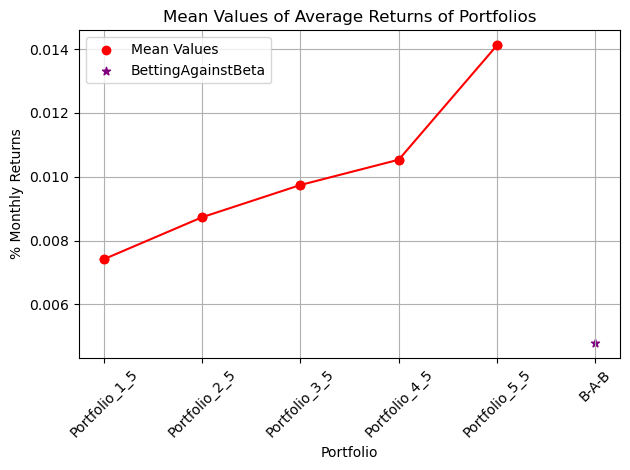

In [29]:
# Extract mean values and column names
mean_values = results_avgdf.loc['Mean'].drop('BettingAgainstBeta')
columns = mean_values.index.tolist()

# Plot scatter plot
plt.scatter(columns, mean_values, label='Mean Values', color='red')

# Plot line joining the points
plt.plot(columns, mean_values, linestyle='-', marker='o', color='red')

# Extract 'BettingAgainstBeta' value
bab_value = results_avgdf.loc['Mean', 'BettingAgainstBeta']

# Plot 'BettingAgainstBeta' as standalone marker (star)
plt.scatter('B-A-B', bab_value, marker='*', color='purple', label='BettingAgainstBeta')

# Set plot labels and title
plt.xlabel('Portfolio')
plt.ylabel('% Monthly Returns')
plt.title('Mean Values of Average Returns of Portfolios')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

### Table 2: CAPM Moments of Monthly Beta Portfolios

In [30]:
# Calculate excess returns for each portfolio
results_monthly_capm = pd.DataFrame(index=['Alpha', 'Alpha t-stat', 'Beta', 'Beta t-stat', 'R2', 'RMSE'])

for col in merged_monthly_portfolios.columns[5:]:
    # Calculate excess returns
    excess_return = merged_monthly_portfolios[col] - merged_monthly_portfolios['RF']

    # Drop NaN values for the columns used in the regression
    rf = merged_monthly_portfolios['RF'].dropna()
    market_rf = merged_monthly_portfolios['Mkt-RF'].dropna()
    excess_return = excess_return.dropna()

    # Align the indices
    excess_return, market_rf = excess_return.align(market_rf, join='inner')

    # Perform CAPM regression
    if not rf.empty and not market_rf.empty and not excess_return.empty:
        capm_results = sm.OLS(excess_return, sm.add_constant(market_rf)).fit()

        # Add the results to the DataFrame
        results_monthly_capm.loc['Alpha', col] = capm_results.params['const']
        results_monthly_capm.loc['Alpha t-stat', col] = capm_results.tvalues['const']
        results_monthly_capm.loc['Beta', col] = capm_results.params['Mkt-RF']
        results_monthly_capm.loc['Beta t-stat', col] = capm_results.tvalues['Mkt-RF']
        results_monthly_capm.loc['R2', col] = capm_results.rsquared*100

        # Calculate RMSE
        predictions = capm_results.predict(sm.add_constant(market_rf))
        rmse = np.sqrt(np.mean((excess_return - predictions) ** 2))
        results_monthly_capm.loc['RMSE', col] = rmse

# Display the results
round(results_monthly_capm, 3)

,Portfolio_1_5,Portfolio_2_5,Portfolio_3_5,Portfolio_4_5,Portfolio_5_5,BettingAgainstBeta
Alpha,0.004,0.003,0.002,0.001,0.001,0.006
Alpha t-stat,6.064,4.195,2.625,0.757,0.304,5.160
Beta,0.461,0.886,1.163,1.493,2.084,-0.167
Beta t-stat,34.099,67.682,76.297,76.750,65.369,-7.852
R2,50.914,80.340,83.853,84.012,79.218,5.213
RMSE,0.024,0.023,0.027,0.035,0.057,0.038


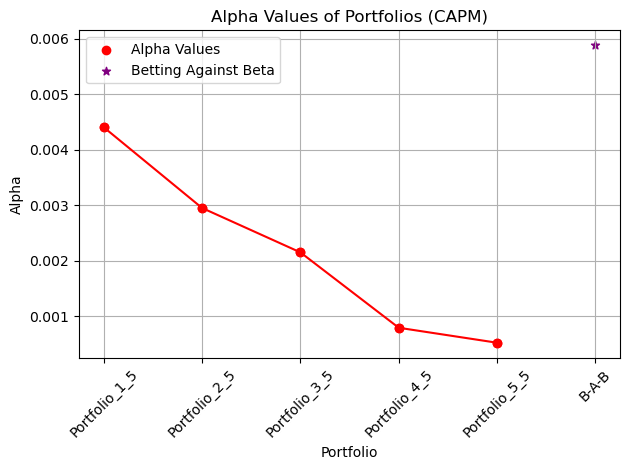

In [31]:
# Extract mean values and column names
mean_values = results_monthly_capm.loc['Alpha'].drop('BettingAgainstBeta')
columns = mean_values.index.tolist()

# Plot scatter plot
plt.scatter(columns, mean_values, label='Alpha Values', color='red')

# Plot line joining the points
plt.plot(columns, mean_values, linestyle='-', marker='o', color='red')

# Extract 'BettingAgainstBeta' value
bab_value_capm = results_monthly_capm.loc['Alpha', 'BettingAgainstBeta']

# Plot 'BettingAgainstBeta' as standalone marker (star)
plt.scatter('B-A-B', bab_value_capm, marker='*', color='purple', label='Betting Against Beta')

# Set plot labels and title
plt.xlabel('Portfolio')
plt.ylabel('Alpha')
plt.title('Alpha Values of Portfolios (CAPM)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

### Table 3: FF 3-Factor Moments of Monthly Beta Portfolios

In [32]:
# Calculate three-factor regression for each portfolio
results_ff = pd.DataFrame(index=['Alpha', 'Alpha t-stat / pval', 'Beta Mkt', 'Beta Mkt t-stat / pval', 'Beta SMB', 'Beta SMB t-stat / pval', 'Beta HML', 'Beta HML t-stat / pval', 'R2', 'RMSE'])

for col in merged_monthly_portfolios.columns[5:]:
    # Calculate excess returns
    excess_return = merged_monthly_portfolios[col] - merged_monthly_portfolios['RF']

    # Drop NaN values for the columns used in the regression
    rf = merged_monthly_portfolios['RF'].dropna()
    market_rf = merged_monthly_portfolios['Mkt-RF'].dropna()
    smb_rf = merged_monthly_portfolios['SMB'].dropna()
    hml_rf = merged_monthly_portfolios['HML'].dropna()
    excess_return = excess_return.dropna()

    # Align the indices
    aligned_data = [excess_return, market_rf, smb_rf, hml_rf]
    aligned_data = [data.loc[excess_return.index] for data in aligned_data]  # Align indices
    excess_return, market_rf, smb_rf, hml_rf = aligned_data

    # Perform three-factor regression
    if not rf.empty and not market_rf.empty and not smb_rf.empty and not hml_rf.empty and not excess_return.empty:
        X = sm.add_constant(pd.DataFrame({'Mkt-RF': market_rf, 'SMB': smb_rf, 'HML': hml_rf}).astype(float))
        excess_return = excess_return.astype(float)
        ff_results = sm.OLS(excess_return, X).fit()

        # Add the results to the DataFrame
        results_ff.loc['Alpha', col] = ff_results.params['const']
        results_ff.loc['Alpha t-stat / pval', col] = "{:.3f} / {:.3f}".format(ff_results.tvalues['const'], ff_results.pvalues['const'])
        results_ff.loc['Beta Mkt', col] = ff_results.params['Mkt-RF']
        results_ff.loc['Beta Mkt t-stat / pval', col] = "{:.3f} / {:.3f}".format(ff_results.tvalues['Mkt-RF'], ff_results.pvalues['Mkt-RF'])
        results_ff.loc['Beta SMB', col] = ff_results.params['SMB']
        results_ff.loc['Beta SMB t-stat / pval', col] = "{:.3f} / {:.3f}".format(ff_results.tvalues['SMB'], ff_results.pvalues['SMB'])
        results_ff.loc['Beta HML', col] = ff_results.params['HML']
        results_ff.loc['Beta HML t-stat / pval', col] = "{:.3f} / {:.3f}".format(ff_results.tvalues['HML'], ff_results.pvalues['HML'])
        results_ff.loc['R2_adj', col] = ff_results.rsquared_adj*100
        results_ff.loc['R2', col] = ff_results.rsquared*100
        # Calculate RMSE
        predictions = ff_results.predict(X)
        rmse = np.sqrt(np.mean((excess_return - predictions) ** 2))
        results_ff.loc['RMSE', col] = rmse

# Round the values in the results DataFrame
results_ff = results_ff.round(3)

# Display the results
results_ff

,Portfolio_1_5,Portfolio_2_5,Portfolio_3_5,Portfolio_4_5,Portfolio_5_5,BettingAgainstBeta
Alpha,0.003567,0.001765,0.000589,-0.001219,-0.002256,0.005946
Alpha t-stat / pval,5.787 / 0.000,3.719 / 0.000,1.331 / 0.183,-2.309 / 0.021,-2.094 / 0.037,5.208 / 0.000
Beta Mkt,0.359581,0.749682,0.982599,1.256591,1.736668,-0.151397
Beta Mkt t-stat / pval,28.998 / 0.000,78.501 / 0.000,110.360 / 0.000,118.289 / 0.000,80.123 / 0.000,-6.590 / 0.000
Beta SMB,0.355033,0.444758,0.59643,0.797005,1.265019,-0.085489
Beta SMB t-stat / pval,17.484 / 0.000,28.440 / 0.000,40.908 / 0.000,45.816 / 0.000,35.641 / 0.000,-2.272 / 0.023
Beta HML,0.193515,0.296603,0.386435,0.486347,0.605752,0.009083
Beta HML t-stat / pval,11.085 / 0.000,22.061 / 0.000,30.829 / 0.000,32.519 / 0.000,19.851 / 0.000,0.281 / 0.779
R2,64.927333,91.108793,95.322735,95.950382,91.843797,5.65097
RMSE,0.020405,0.015714,0.014651,0.01748,0.035666,0.037804


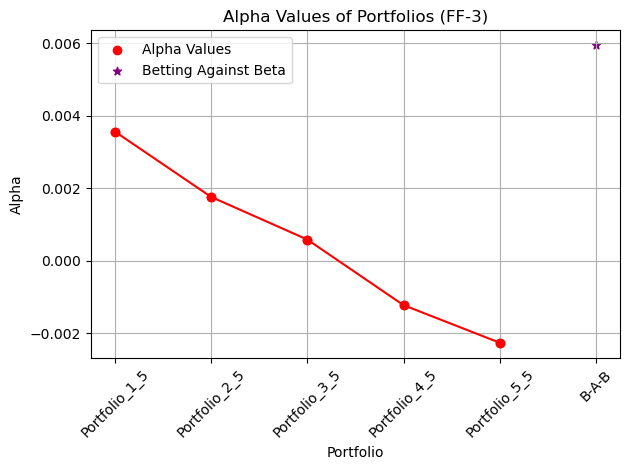

In [33]:
# Extract mean values and column names
mean_values = results_ff.loc['Alpha'].drop('BettingAgainstBeta')
columns = mean_values.index.tolist()

# Plot scatter plot
plt.scatter(columns, mean_values, label='Alpha Values', color='red')

# Plot line joining the points
plt.plot(columns, mean_values, linestyle='-', marker='o', color='red')

# Extract 'BettingAgainstBeta' value
bab_value_ff = results_ff.loc['Alpha', 'BettingAgainstBeta']

# Plot 'BettingAgainstBeta' as standalone marker (star)
plt.scatter('B-A-B', bab_value_ff, marker='*', color='purple', label='Betting Against Beta')

# Set plot labels and title
plt.xlabel('Portfolio')
plt.ylabel('Alpha')
plt.title('Alpha Values of Portfolios (FF-3)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Extension

### Seeing performance of all portfolios in different market conditions (Bullish, Bearish and Flatish)

### (a) Bullish:

#### Portfolio Performance on Bullish Markets
#### Time Period: 2011 - 2020

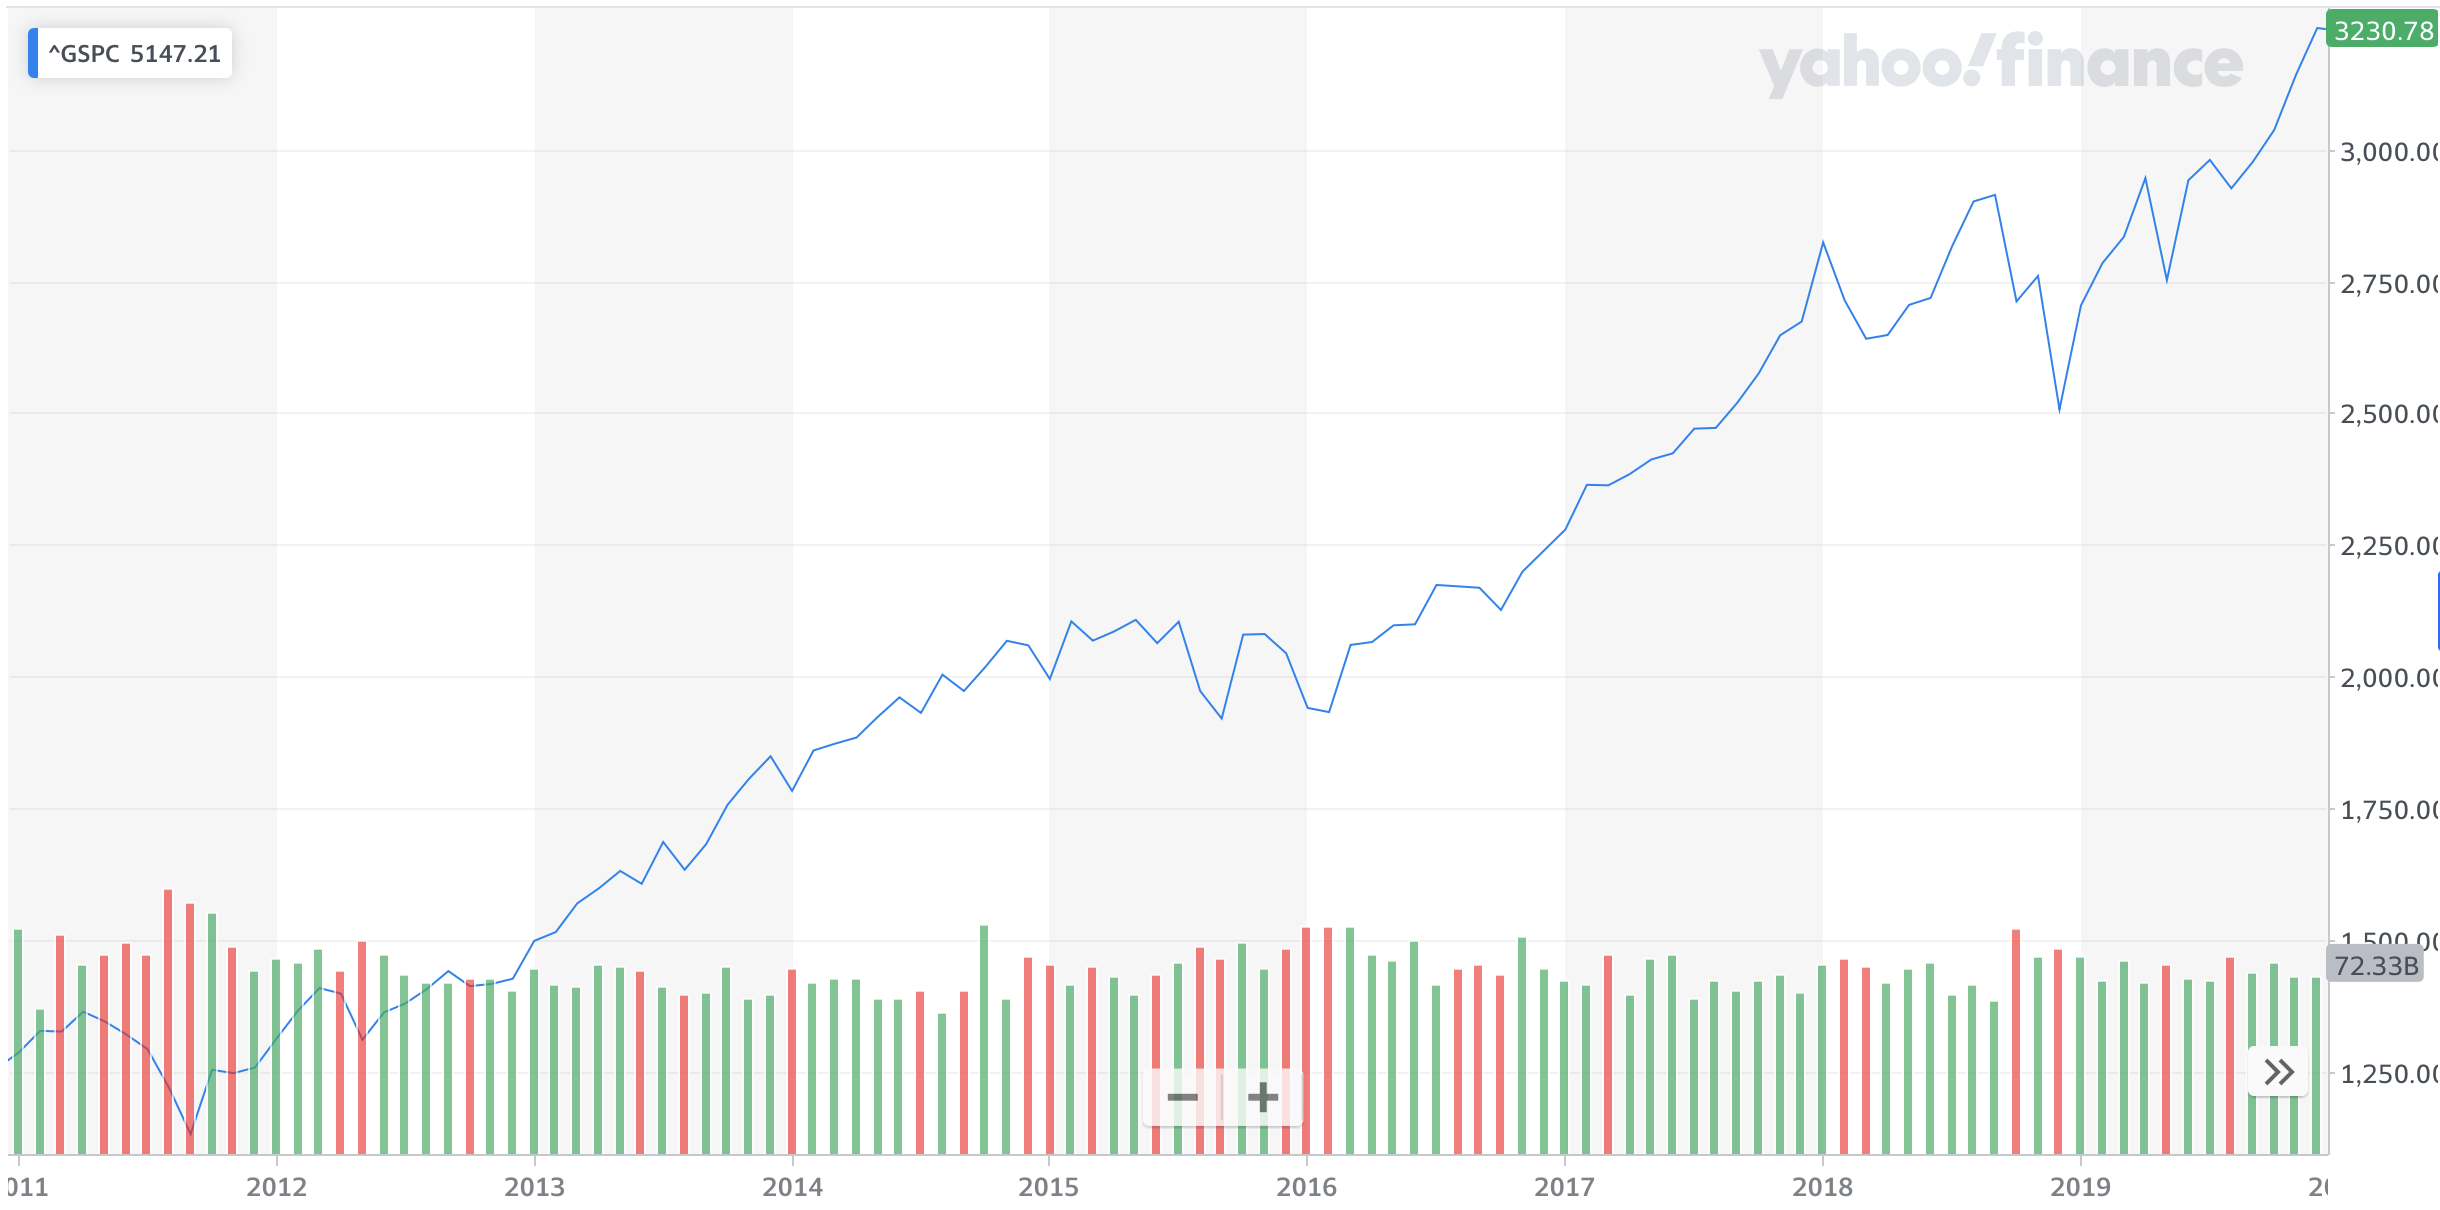

Source: Yahoo Finance S&P500 Chart - https://yhoo.it/3kFXcYt

In [34]:
bullish = merged_monthly_portfolios[(merged_monthly_portfolios['Date']>=201101) & (merged_monthly_portfolios['Date']<=202001)]

In [35]:
bullish['Date'] = pd.to_datetime(bullish['Date'], format='%Y%m')

# Set 'Date' column as the index
bullish.set_index('Date', inplace=True)

In [36]:
column_mapping = {
    'Portfolio_1_5': 'P1',
    'Portfolio_2_5': 'P2',
    'Portfolio_3_5': 'P3',
    'Portfolio_4_5': 'P4',
    'Portfolio_5_5': 'P5',
    'BettingAgainstBeta': 'BaB'
}

# Rename the columns using the mapping
bullish = bullish.rename(columns=column_mapping)

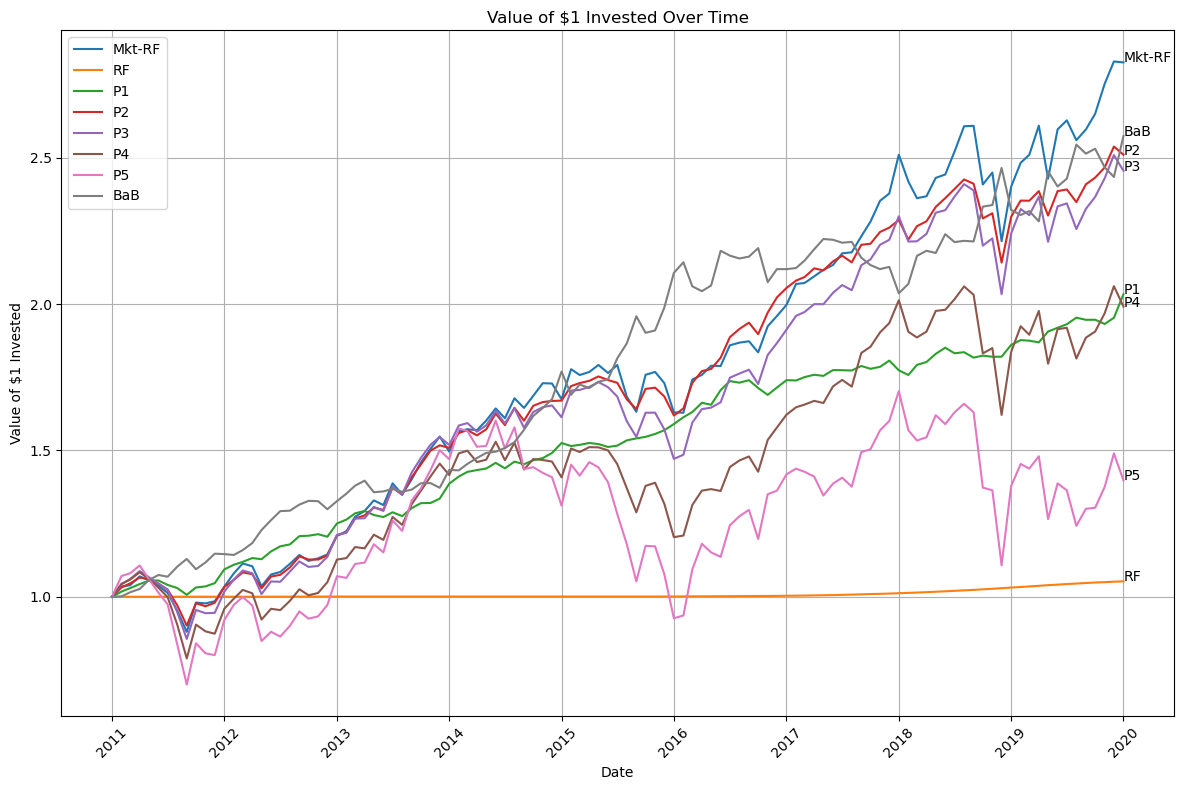

In [37]:
# Calculate the cumulative returns based on the value of $1 invested initially
cumulative_returns = (bullish[['Mkt-RF','RF','P1','P2','P3','P4','P5','BaB']] + 1).cumprod()

# Normalize the data based on the value of $1 invested initially
normalized_returns = cumulative_returns / cumulative_returns.iloc[0]

# Plotting
plt.figure(figsize=(12, 8))
for column in normalized_returns.columns:
    plt.plot(normalized_returns.index, normalized_returns[column], label=column)

# Adding annotations
for column in normalized_returns.columns:
    plt.text(normalized_returns.index[-1], normalized_returns[column].iloc[-1], column, ha='left')
    
plt.title('Value of $1 Invested Over Time')
plt.xlabel('Date')
plt.ylabel('Value of $1 Invested')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### (b) Bearish/Volatile:
#### Portfolio Performance on Bearish/Volatile Markets
#### Time Period: 2000 - 2010

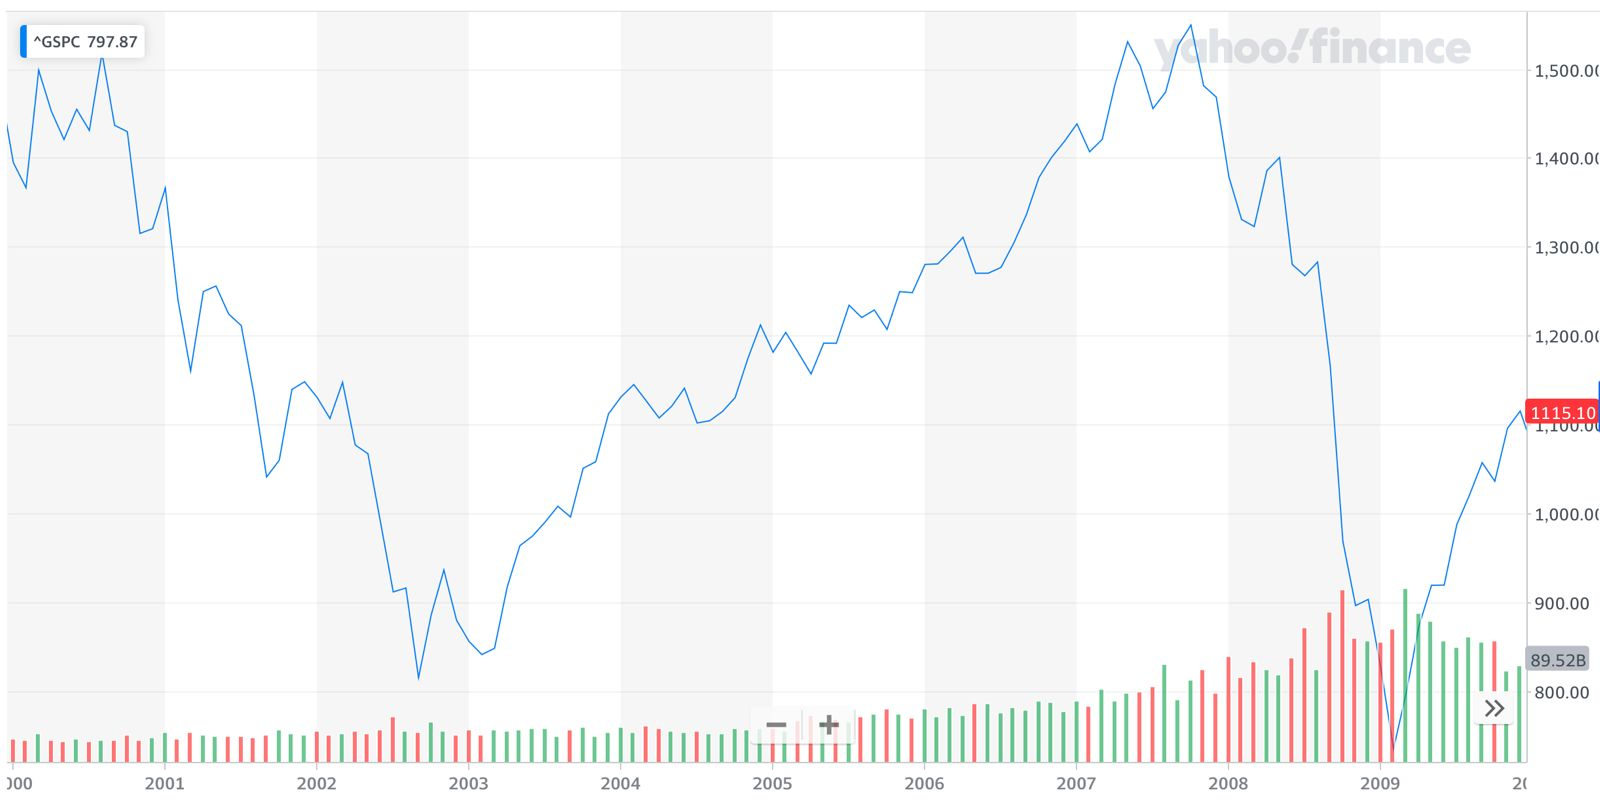


Source: Yahoo Finance S&P500 Chart - https://yhoo.it/3kFXcYt

In [38]:
bearish = merged_monthly_portfolios[(merged_monthly_portfolios['Date']>=200001) & (merged_monthly_portfolios['Date']<=201001)]

In [39]:
bearish['Date'] = pd.to_datetime(bearish['Date'], format='%Y%m')

# Set 'Date' column as the index
bearish.set_index('Date', inplace=True)

In [40]:
column_mapping = {
    'Portfolio_1_5': 'P1',
    'Portfolio_2_5': 'P2',
    'Portfolio_3_5': 'P3',
    'Portfolio_4_5': 'P4',
    'Portfolio_5_5': 'P5',
    'BettingAgainstBeta': 'BaB'
}

# Rename the columns using the mapping
bearish = bearish.rename(columns=column_mapping)

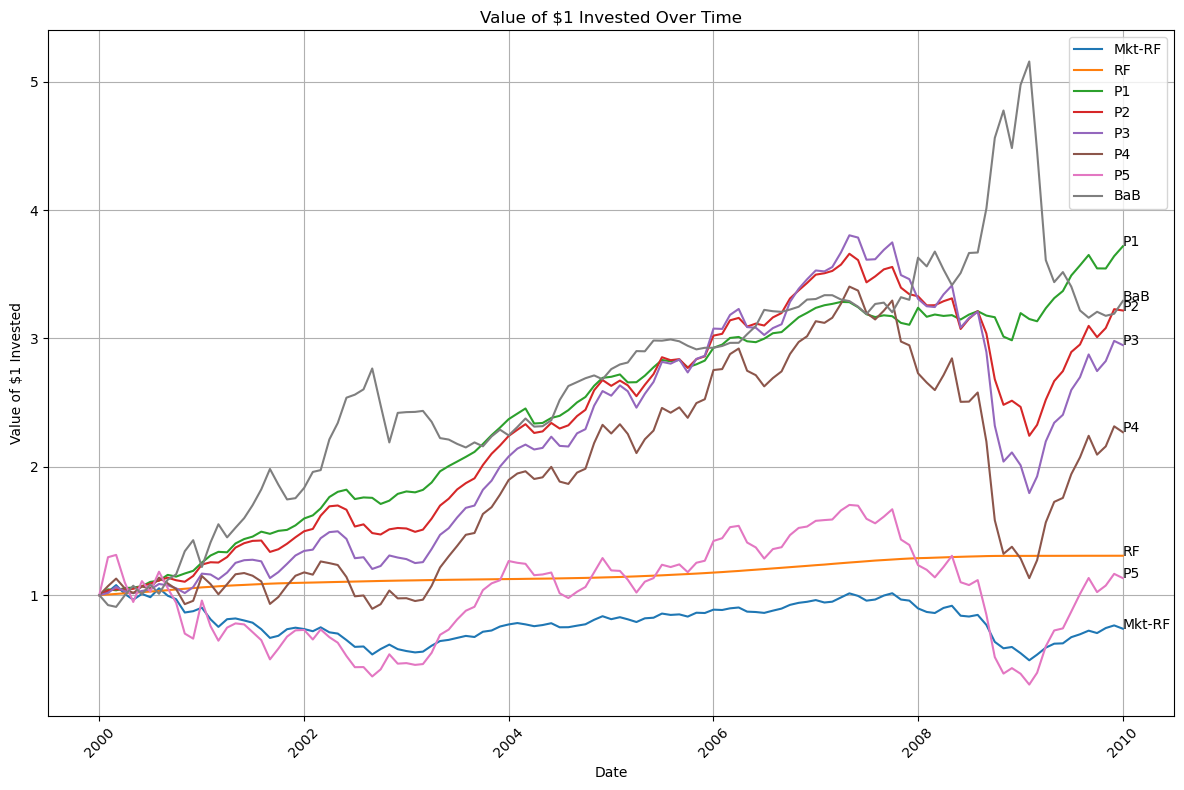

In [41]:
# Calculate the cumulative returns based on the value of $1 invested initially
cumulative_returns = (bearish[['Mkt-RF','RF','P1','P2','P3','P4','P5','BaB']] + 1).cumprod()

# Normalize the data based on the value of $1 invested initially
normalized_returns = cumulative_returns / cumulative_returns.iloc[0]

# Plotting
plt.figure(figsize=(12, 8))
for column in normalized_returns.columns:
    plt.plot(normalized_returns.index, normalized_returns[column], label=column)

# Adding annotations
for column in normalized_returns.columns:
    plt.text(normalized_returns.index[-1], normalized_returns[column].iloc[-1], column, ha='left')
    
plt.title('Value of $1 Invested Over Time')
plt.xlabel('Date')
plt.ylabel('Value of $1 Invested')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### (c) Flattish:
#### Portfolio Performance on Flattish Markets
#### Time Period: 1970 - 1980

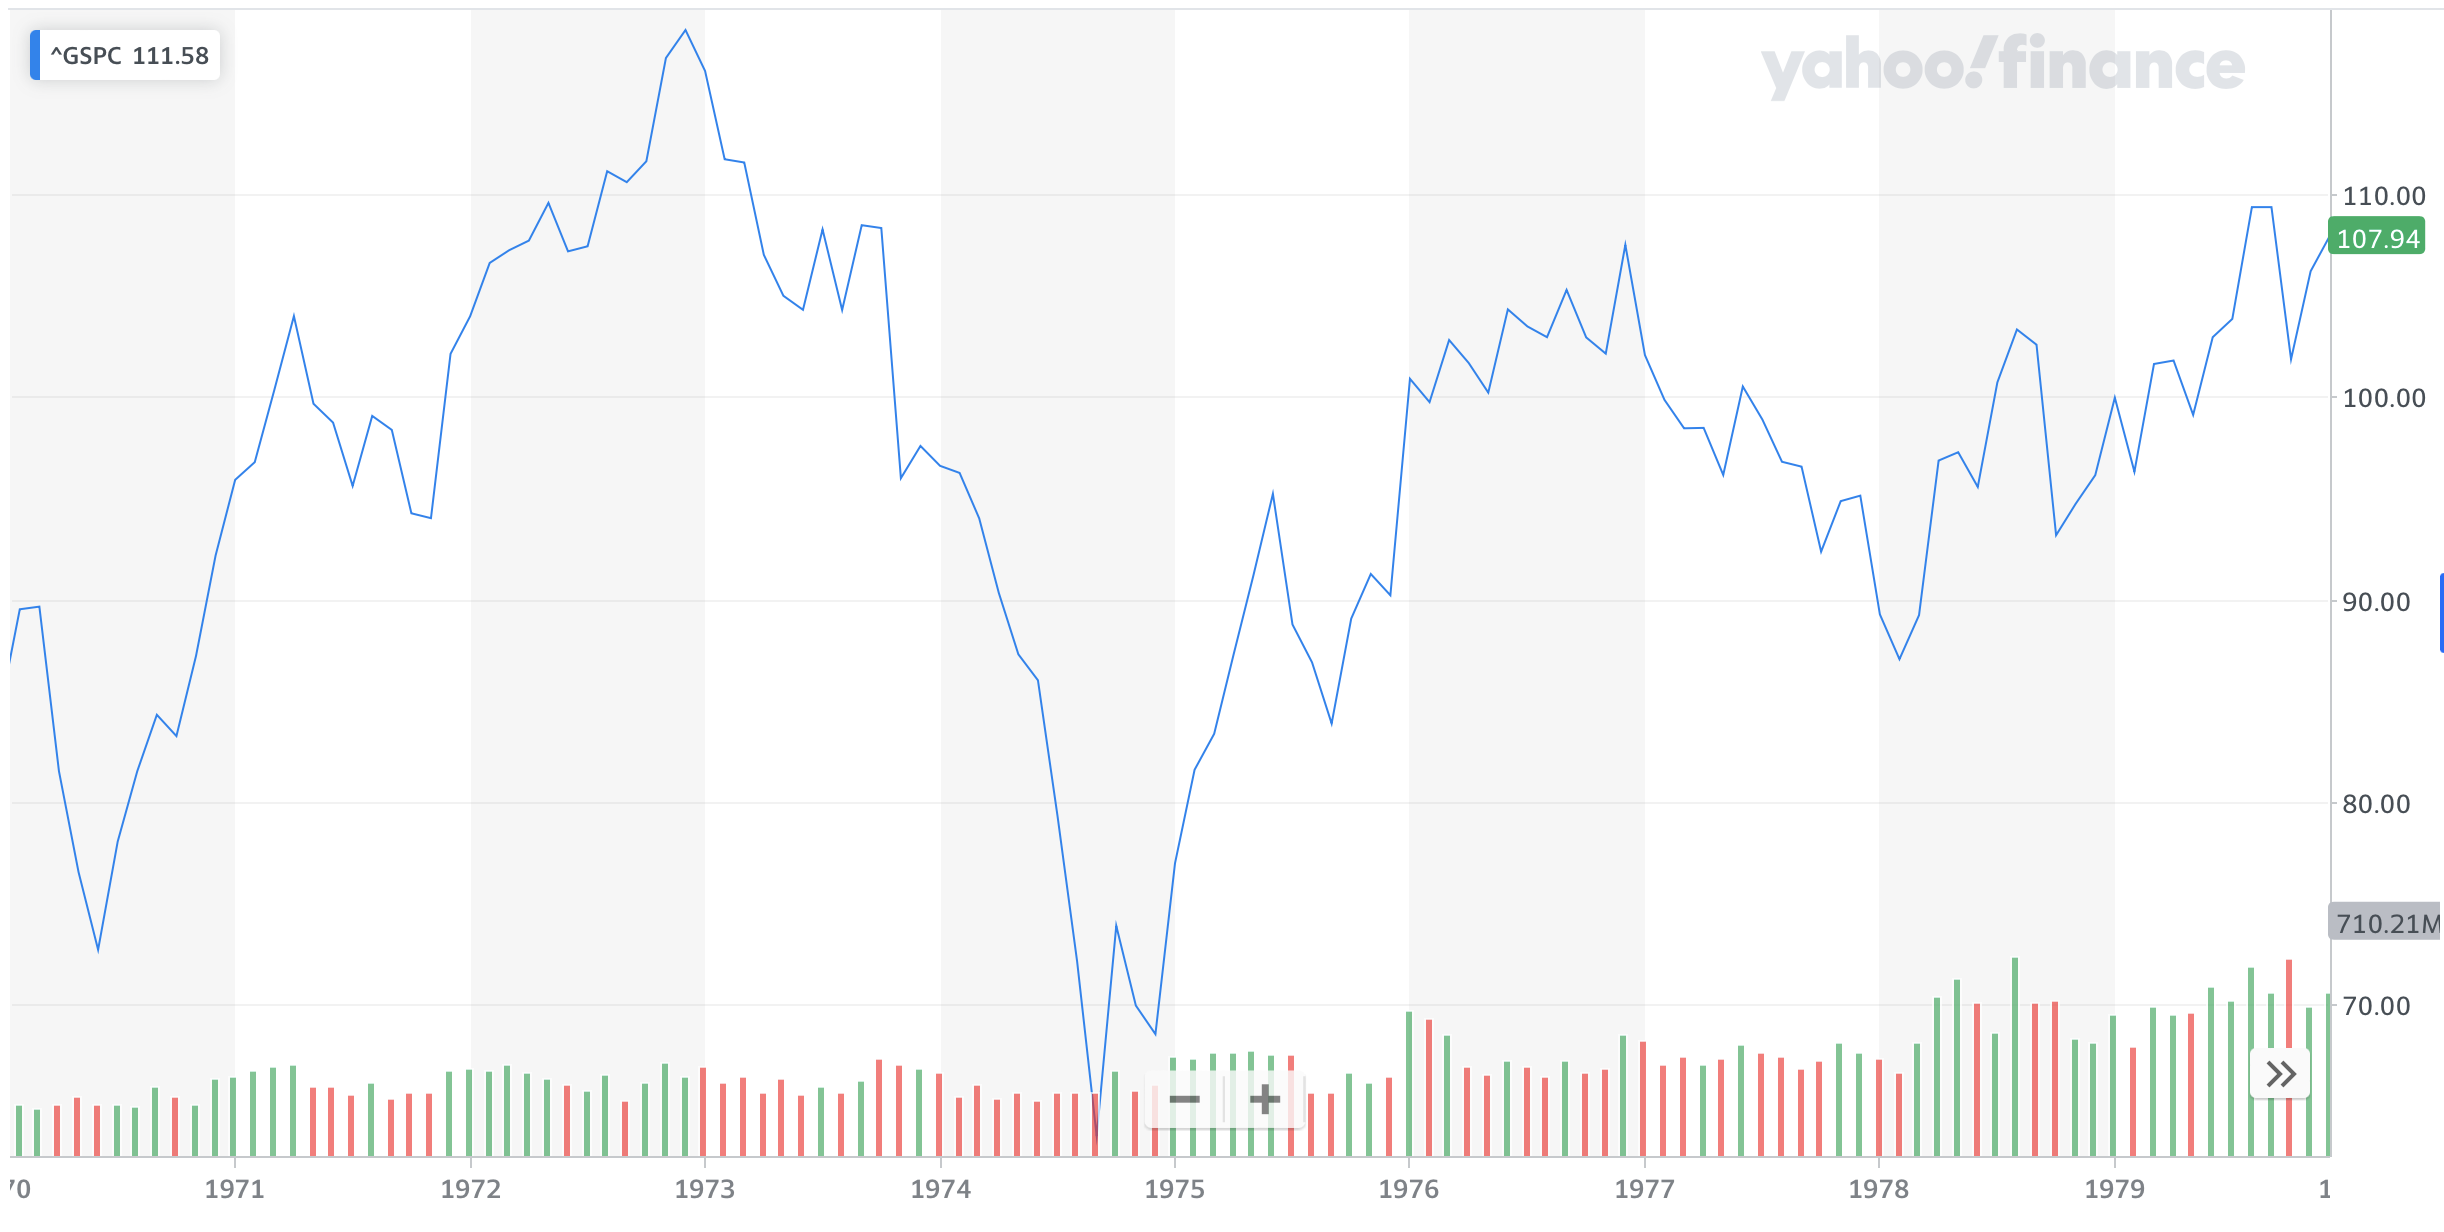

Source: Yahoo Finance S&P500 Chart - https://yhoo.it/3kFXcYt

In [42]:
flattish = merged_monthly_portfolios[(merged_monthly_portfolios['Date']>=197001) & (merged_monthly_portfolios['Date']<=198001)]

In [43]:
flattish['Date'] = pd.to_datetime(flattish['Date'], format='%Y%m')

# Set 'Date' column as the index
flattish.set_index('Date', inplace=True)

In [44]:
column_mapping = {
    'Portfolio_1_5': 'P1',
    'Portfolio_2_5': 'P2',
    'Portfolio_3_5': 'P3',
    'Portfolio_4_5': 'P4',
    'Portfolio_5_5': 'P5',
    'BettingAgainstBeta': 'BaB'
}

# Rename the columns using the mapping
flattish = flattish.rename(columns=column_mapping)

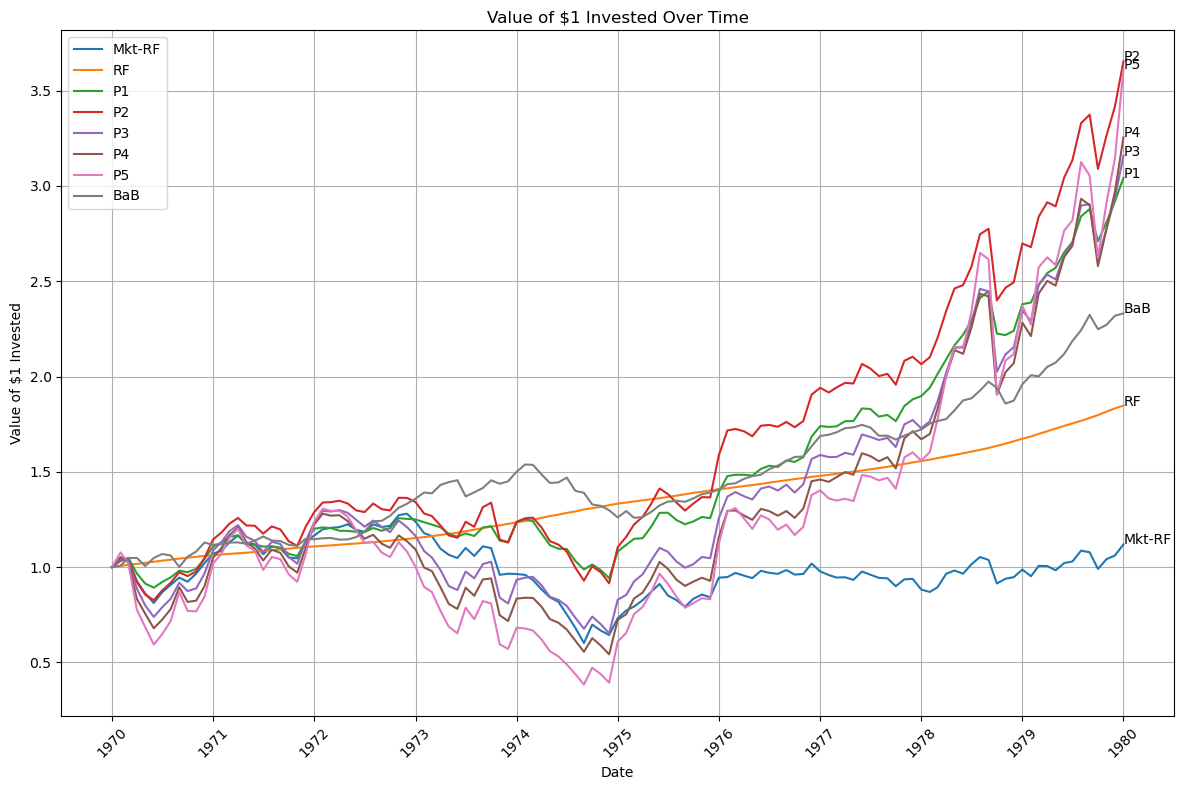

In [45]:
# Calculate the cumulative returns based on the value of $1 invested initially
cumulative_returns = (flattish[['Mkt-RF','RF','P1','P2','P3','P4','P5','BaB']] + 1).cumprod()

# Normalize the data based on the value of $1 invested initially
normalized_returns = cumulative_returns / cumulative_returns.iloc[0]

# Plotting
plt.figure(figsize=(12, 8))
for column in normalized_returns.columns:
    plt.plot(normalized_returns.index, normalized_returns[column], label=column)

# Adding annotations
for column in normalized_returns.columns:
    plt.text(normalized_returns.index[-1], normalized_returns[column].iloc[-1], column, ha='left')
    
plt.title('Value of $1 Invested Over Time')
plt.xlabel('Date')
plt.ylabel('Value of $1 Invested')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()